This notebook analyzes a small electronics store's sales.  
Tools used: **sqlite3**, **pandas**, **matplotlib**


In [1]:
import sqlite3

conn = sqlite3.connect("electronics_sales.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Smartphone", 3, 15000.0),
    ("Laptop", 2, 55000.0),
    ("Phone Charger", 5, 500.0),
    ("Laptop", 1, 55000.0),
    ("Headphones", 4, 2000.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

print("Electronics sales data inserted into electronics_sales.db.")


Electronics sales data inserted into electronics_sales.db.


In [2]:
import pandas as pd

conn = sqlite3.connect("electronics_sales.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

df


,product,total_qty,revenue
0,Headphones,4,8000.0
1,Laptop,3,165000.0
2,Phone Charger,5,2500.0
3,Smartphone,3,45000.0


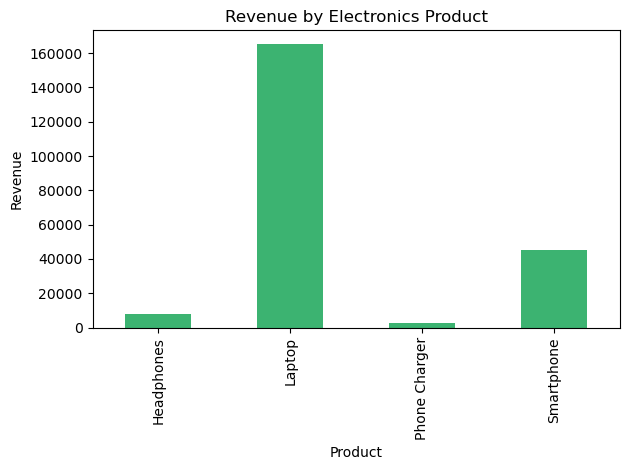

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', color='mediumseagreen', legend=False)
plt.title("Revenue by Electronics Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
